<a href="https://colab.research.google.com/github/Alextheprogrammer3/Machine-Learning-Model-/blob/main/notebook0689445c72.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'icc-mens-t20-world-cup-2024-stats:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5312813%2F8890895%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240717%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240717T133249Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D282bd9c387283c7b3a85ac0eb87a8741b817562ffa4ec0c4640ab01af8045c835c6e3854f1cd6883d21d923cc7b015e0e6d0da27fe99b202b75b17a8444171cb178e08abe25fe1159838fafcf82856b10904113f36616bad33e4a90e6713d64483035107e742db030b818b9b9d874e565ebd9503b645dd76e2eb2f94c648132ea5037f5be78a5ccb543e180b4c42fd40e6868b355432569fd2fb3eede74526e84b7d967120b9f2477d0261b19ef8debb91ac5fcaa2cda5f00e7ee240975e1b8e8b7bad2d5e8e856c9ab1993f17340900f9b983f28927892a7cac704e71f91dd8d1b1cab8c1f09fb0e285ffa2253fb786e3b38ffa286521c7e38bd0a43cb119e5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icc-mens-t20-world-cup-2024-stats/match_results_for_icc_mens_t20_world_cup_2024.csv
/kaggle/input/icc-mens-t20-world-cup-2024-stats/fielding_stats_for_icc_mens_t20_world_cup_2024.csv
/kaggle/input/icc-mens-t20-world-cup-2024-stats/wk_stats_for_icc_mens_t20_world_cup_2024.csv
/kaggle/input/icc-mens-t20-world-cup-2024-stats/bowling_stats_for_icc_mens_t20_world_cup_2024.csv
/kaggle/input/icc-mens-t20-world-cup-2024-stats/batting_stats_for_icc_mens_t20_world_cup_2024.csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_batting = pd.read_csv('/kaggle/input/icc-mens-t20-world-cup-2024-stats/batting_stats_for_icc_mens_t20_world_cup_2024.csv')

In [ ]:
df_batting[df_batting['SR']>200]

,Player,Team,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
72,PW Hasaranga,Sri Lanka,3,3,1,20,20*,10.0,222.22,0,0,2
152,Naseem Shah,Pakistan,3,1,1,10,10*,0.0,250.00,0,0,0


In [ ]:
df_batting.shape


(247, 12)

         Player                      Team  Mat  Inns  NO  Runs   HS   Ave  \
0    NP Kenjige  United States of America    4     2   0     1    1   0.5   
1   Aaron Jones  United States of America    6     6   2   162  94*  40.5   
2  Aasif Sheikh                     Nepal    3     3   0    63   42  21.0   
3  Abbas Afridi                  Pakistan    1     1   0    17   17  17.0   
4     F Achelam                    Uganda    1     1   0     9    9   9.0   

       SR  100  50  0  
0   25.00    0   0  1  
1  135.00    0   1  1  
2   88.73    0   0  0  
3   80.95    0   0  0  
4   69.23    0   0  0  


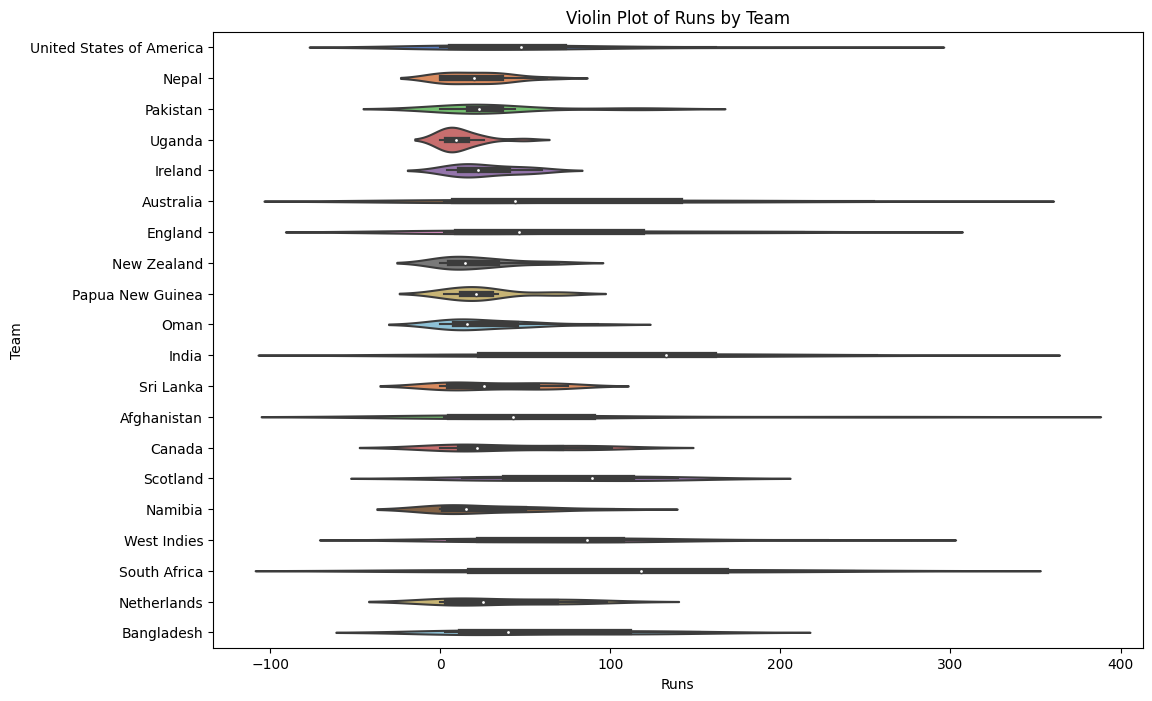

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df_batting = pd.read_csv('/kaggle/input/icc-mens-t20-world-cup-2024-stats/batting_stats_for_icc_mens_t20_world_cup_2024.csv')

# Display the first few rows of the dataset to understand its structure
print(df_batting.head())

# Violin plot for Runs by Team
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_batting, x='Runs', y='Team', palette='muted')
plt.title('Violin Plot of Runs by Team')
plt.xlabel('Runs')
plt.ylabel('Team')
plt.show()


In [ ]:
import pandas as pd

# Assuming you have already loaded df_batting from your specified path
df_batting = pd.read_csv('/kaggle/input/icc-mens-t20-world-cup-2024-stats/batting_stats_for_icc_mens_t20_world_cup_2024.csv')

# Filter rows where 'SR' is greater than 200
filtered_data = df_batting[df_batting['SR'] > 200]

# Display the filtered data
print(filtered_data)


           Player       Team  Mat  Inns  NO  Runs   HS   Ave      SR  100  50  \
72   PW Hasaranga  Sri Lanka    3     3   1    20  20*  10.0  222.22    0   0   
152   Naseem Shah   Pakistan    3     1   1    10  10*   0.0  250.00    0   0   

     0  
72   2  
152  0  


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df_batting is your DataFrame
df_batting = pd.read_csv('/kaggle/input/icc-mens-t20-world-cup-2024-stats/batting_stats_for_icc_mens_t20_world_cup_2024.csv')

# Selecting features and target
X = df_batting[['Mat', 'Inns', 'Runs', 'Ave', '100', '50', '0']]  # Features
y = df_batting['SR']  # Target (Strike Rate)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)  # Reshape for single output
y_test = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)  # Reshape for single output

# Define a simple neural network model
class SRPredictor(nn.Module):
    def __init__(self):
        super(SRPredictor, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Output layer with 1 neuron for SR prediction

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = SRPredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')


Epoch [10/100], Loss: 9956.8350
Epoch [20/100], Loss: 9882.9609
Epoch [30/100], Loss: 9776.3428
Epoch [40/100], Loss: 9625.1172
Epoch [50/100], Loss: 9415.4189
Epoch [60/100], Loss: 9131.3398
Epoch [70/100], Loss: 8757.2939
Epoch [80/100], Loss: 8281.5186
Epoch [90/100], Loss: 7700.7959
Epoch [100/100], Loss: 7023.2104
Test Loss: 7435.1152


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Example evaluation code after model training
with torch.no_grad():
    predictions = model(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)  # RMSE
    r2 = r2_score(y_test, predictions)

    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'R-squared (R2): {r2:.4f}')


Mean Squared Error (MSE): 7435.1152
Mean Absolute Error (MAE): 75.8684
Root Mean Squared Error (RMSE): 86.2271
R-squared (R2): -1.9638


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Assuming you have loaded your dataset
df_batting = pd.read_csv('/kaggle/input/icc-mens-t20-world-cup-2024-stats/batting_stats_for_icc_mens_t20_world_cup_2024.csv')

# Assuming X and y are defined correctly
X = df_batting[['Inns', 'SR']]
y = df_batting['Runs']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

# Normalize features if necessary (optional)
scaler = StandardScaler()
X_train_tensor = torch.tensor(scaler.fit_transform(X_train.values), dtype=torch.float32)
X_test_tensor = torch.tensor(scaler.transform(X_test.values), dtype=torch.float32)


In [ ]:
class SalesPredictor(nn.Module):
    def __init__(self):
        super(SalesPredictor, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)  # Output layer, 1 output for regression

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
model = SalesPredictor()


In [ ]:
criterion = nn.MSELoss()  # Mean Squared Error loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 6076.2227
Epoch [20/100], Loss: 5995.2910
Epoch [30/100], Loss: 5881.1460
Epoch [40/100], Loss: 5721.2773
Epoch [50/100], Loss: 5505.2485
Epoch [60/100], Loss: 5225.6289
Epoch [70/100], Loss: 4877.6343
Epoch [80/100], Loss: 4461.0933
Epoch [90/100], Loss: 3982.6091
Epoch [100/100], Loss: 3456.6304


In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse = mean_squared_error(y_test_tensor.numpy(), predictions.numpy())
    mae = mean_absolute_error(y_test_tensor.numpy(), predictions.numpy())
    rmse = mean_squared_error(y_test_tensor.numpy(), predictions.numpy(), squared=False)
    r2 = r2_score(y_test_tensor.numpy(), predictions.numpy())

    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'R-squared (R2): {r2:.4f}')


Mean Squared Error (MSE): 2357.6331
Mean Absolute Error (MAE): 29.6236
Root Mean Squared Error (RMSE): 48.5555
R-squared (R2): 0.1143


In [ ]:
import pandas as pd

# Load the dataset (replace with your actual dataset path)
file_path = '/kaggle/input/icc-mens-t20-world-cup-2024-stats/batting_stats_for_icc_mens_t20_world_cup_2024.csv'
df = pd.read_csv(file_path)

# Print columns to inspect their names
print(df.columns)

# Define features (X) and target (y) based on actual column names
X = df[['Player', 'Team', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'SR', '100', '50', '0']]  # Replace with actual feature column names
y = df['Runs']  # Replace with actual target column name

# Example usage: Print first few rows of X and y
print("X (features):")
print(X.head())

print("\ny (target):")
print(y.head())


Index(['Player', 'Team', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'SR', '100',
       '50', '0'],
      dtype='object')
X (features):
         Player                      Team  Mat  Inns  NO  Runs   HS   Ave  \
0    NP Kenjige  United States of America    4     2   0     1    1   0.5   
1   Aaron Jones  United States of America    6     6   2   162  94*  40.5   
2  Aasif Sheikh                     Nepal    3     3   0    63   42  21.0   
3  Abbas Afridi                  Pakistan    1     1   0    17   17  17.0   
4     F Achelam                    Uganda    1     1   0     9    9   9.0   

       SR  100  50  0  
0   25.00    0   0  1  
1  135.00    0   1  1  
2   88.73    0   0  0  
3   80.95    0   0  0  
4   69.23    0   0  0  

y (target):
0      1
1    162
2     63
3     17
4      9
Name: Runs, dtype: int64


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Player    0
Team      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
SR        0
100       0
50        0
0         0
dtype: int64


In [ ]:
# Example of one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['Player', 'Team'])


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame with columns Player and Team
# Example data (adjust based on your actual DataFrame)
data = {
    'Player': ['NP Kenjige', 'Aaron Jones', 'Aasif Sheikh', 'Abbas Afridi', 'F Achelam'],
    'Team': ['United States of America', 'United States of America', 'Nepal', 'Pakistan', 'Uganda'],
    'Mat': [4, 6, 3, 1, 1],
    'Inns': [2, 6, 3, 1, 1],
    'NO': [0, 2, 0, 0, 0],
    'Runs': [1, 162, 63, 17, 9],
    'HS': ['1', '94*', '42', '17', '9'],
    'Ave': [0.5, 40.5, 21.0, 17.0, 9.0],
    'SR': [25.00, 135.00, 88.73, 80.95, 69.23],
    '100': [0, 0, 0, 0, 0],
    '50': [0, 1, 0, 0, 0],
    '0': [1, 1, 0, 0, 0]
}

df = pd.DataFrame(data)

# Extract numerical and categorical columns
numerical_columns = ['Mat', 'Inns', 'NO', 'Runs', 'Ave', 'SR', '100', '50', '0']
categorical_columns = ['Player', 'Team']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(df[numerical_columns + categorical_columns], columns=categorical_columns)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaled data
X_scaled = scaler.fit_transform(X_encoded)

# Now X_scaled is ready for further processing, such as model training


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example: Assuming y is your target variable (Runs in this case)
y = df['Runs']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model (linear regression in this example)
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Mean Squared Error (MSE): 15562.2451
Mean Absolute Error (MAE): 124.7487
Root Mean Squared Error (RMSE): 124.7487
R-squared (R2): nan


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
df.columns

Index(['Player', 'Team', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'SR', '100',
       '50', '0'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset
file_path = '/kaggle/input/icc-mens-t20-world-cup-2024-stats/batting_stats_for_icc_mens_t20_world_cup_2024.csv'
df = pd.read_csv(file_path)

# Feature Engineering
# Convert 'HS' to numerical (remove '*')
df['HS'] = df['HS'].apply(lambda x: int(x[:-1]) if '*' in x else int(x))

# Create new features
df['Experience_Factor'] = df['Mat'] / df['Inns']  # Example of combining 'Mat' and 'Inns'
df['Impact_Ratio'] = df['Runs'] / (df['100'] * 100 + df['50'] * 50 + 1)  # Example of combining 'Runs', '100', and '50'
df['Performance_Index'] = df['Ave'] * df['SR']  # Example of combining 'Ave' and 'SR'

# Define features (X) and target (y)
X = df[['Mat', 'Inns', 'NO', 'HS', 'Ave', 'SR', '100', '50', 'Experience_Factor', 'Impact_Ratio', 'Performance_Index']]
y = df['Runs']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model (linear regression)
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Mean Squared Error (MSE): 177.6009
Mean Absolute Error (MAE): 8.2733
Root Mean Squared Error (RMSE): 13.3267
R-squared (R2): 0.9333


In [ ]:
# Calculate Batting Average per Inning
df['Batting_Average_Per_Inning'] = df['Ave'] / df['Inns']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the data
X_scaled = scaler.fit_transform(X_encoded)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example of defining X_scaled and y (replace with your actual data)
# Assuming X_scaled is a numpy array or pandas DataFrame with shape (n_samples, n_features)
X_scaled = np.random.rand(100, 10)  # Example: 100 samples, 10 features

# Assuming y is a numpy array or pandas Series with shape (n_samples,)
y = np.random.rand(100)  # Example: 100 target values

# Print shapes to debug
print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)


X_scaled shape: (100, 10)
y shape: (100,)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Assuming X_scaled and y are prepared as per your needs

# Example: Assuming X_scaled and y are already defined
X_scaled = np.random.rand(100, 10)  # Example: 100 samples, 10 features
y = np.random.rand(100)  # Example: 100 target values

# Print shapes to debug
print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Evaluate the model
mse = np.mean((rf_model.predict(X_test) - y_test) ** 2)
mae = np.mean(np.abs(rf_model.predict(X_test) - y_test))
rmse = np.sqrt(mse)
r2 = rf_model.score(X_test, y_test)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


X_scaled shape: (100, 10)
y shape: (100,)
Mean Squared Error (MSE): 0.0751
Mean Absolute Error (MAE): 0.2382
Root Mean Squared Error (RMSE): 0.2740
R-squared (R2): -0.1054


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset (replace with your actual path)
file_path = '/kaggle/input/icc-mens-t20-world-cup-2024-stats/batting_stats_for_icc_mens_t20_world_cup_2024.csv'
df = pd.read_csv(file_path)

# Define features (X) and target (y)
X = df[['Mat', 'Inns', 'NO', 'Ave', 'SR', '100', '50', '0']]  # Numerical features
y = df['Runs']  # Target variable

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train your model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Mean Squared Error (MSE): 18.7408
Mean Absolute Error (MAE): 1.2986
Root Mean Squared Error (RMSE): 4.3291
R-squared (R2): 0.9930


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

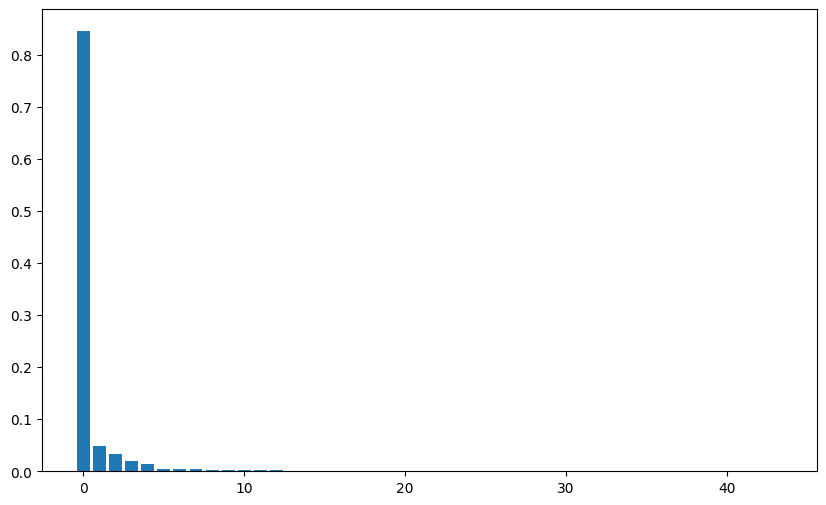

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming rf_model is your trained RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (MSE): -187.4068683303704


In [ ]:
import joblib
import pandas as pd
import numpy as np

# Assuming X_test and y_test are defined and X_test is a DataFrame

# Save the model to a file
model_filename = 'rf_model.pkl'
joblib.dump(best_rf_model, model_filename)

# Load the model from the file
loaded_model = joblib.load(model_filename)

# Example prediction using loaded model
# Assuming X_test is a DataFrame and you want to predict the first row
# Convert X_test to numpy array and then select the first row
example_prediction = loaded_model.predict(X_test.iloc[[0]].values.reshape(1, -1))
print("Example Prediction:", example_prediction)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

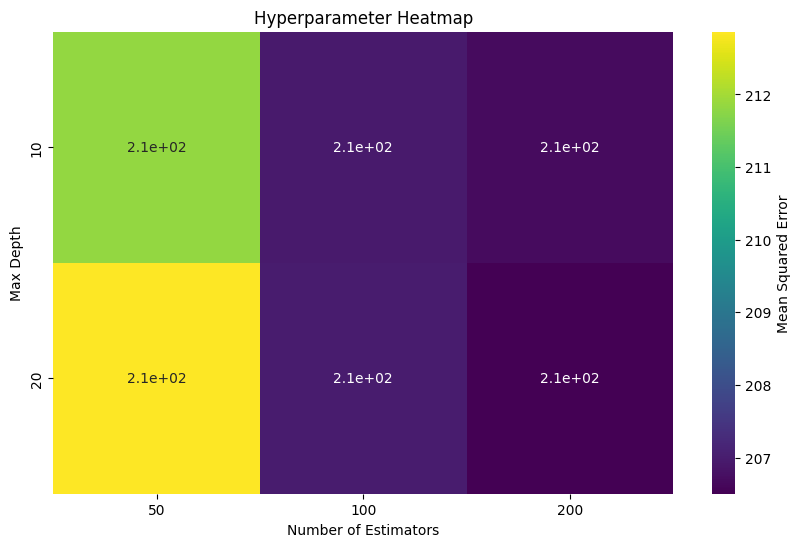

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract results from grid search
results = grid_search.cv_results_

# Create a DataFrame from results
results_df = pd.DataFrame(results)

# Pivot the DataFrame for heatmap plotting
heatmap_data = results_df.pivot_table(
    index='param_max_depth',
    columns='param_n_estimators',
    values='mean_test_score'
)

# Convert mean_test_score from negative MSE to positive MSE for visualization
heatmap_data = -heatmap_data

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar_kws={'label': 'Mean Squared Error'})
plt.title('Hyperparameter Heatmap')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()


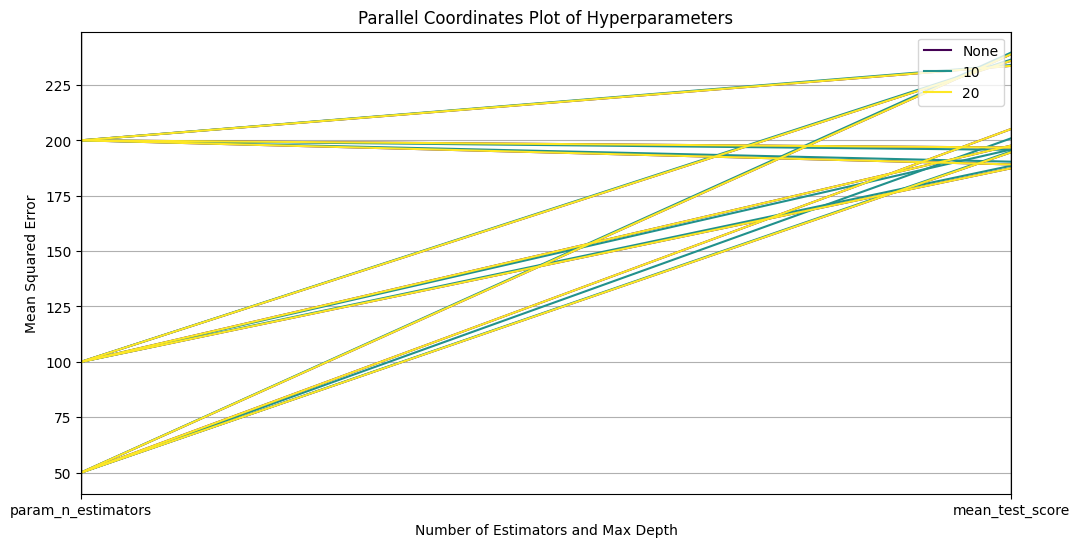

In [ ]:
from pandas.plotting import parallel_coordinates

# Create DataFrame for parallel coordinates plot
parallel_df = results_df[['param_n_estimators', 'param_max_depth', 'mean_test_score']].copy()

# Convert mean_test_score from negative MSE to positive MSE for visualization
parallel_df['mean_test_score'] = -parallel_df['mean_test_score']

# Plot parallel coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(parallel_df, 'param_max_depth', color=plt.cm.viridis(np.linspace(0, 1, len(parallel_df['param_max_depth'].unique()))))
plt.title('Parallel Coordinates Plot of Hyperparameters')
plt.xlabel('Number of Estimators and Max Depth')
plt.ylabel('Mean Squared Error')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


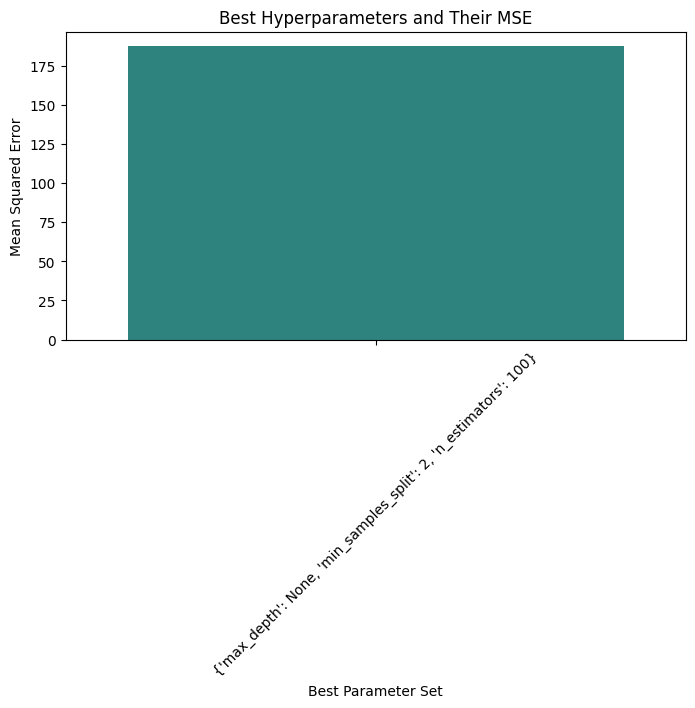

In [ ]:
# Extract the best parameters and corresponding mean test scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create DataFrame for plotting
bar_df = pd.DataFrame({
    'Parameter': [str(best_params)],
    'MSE': [-best_score]
})

# Plot bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='Parameter', y='MSE', data=bar_df, palette='viridis')
plt.title('Best Hyperparameters and Their MSE')
plt.xlabel('Best Parameter Set')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Example data preparation (Replace with your actual data)
# Simulate non-numeric and numeric data
X_encoded = pd.DataFrame({
    'Feature1': np.random.rand(10),
    'Feature2': np.random.rand(10),
    'Category': ['A', 'B', 'A', 'B', 'C', 'A', 'C', 'B', 'A', 'C']
})

# Check for non-numeric columns
non_numeric_cols = X_encoded.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print(f"Non-numeric columns found: {non_numeric_cols}")

    # Convert non-numeric columns to numeric using one-hot encoding
    X_encoded = pd.get_dummies(X_encoded, columns=non_numeric_cols, drop_first=True)
    print("Non-numeric columns have been converted to numeric using one-hot encoding.")
else:
    print("No non-numeric columns found.")

# Check for missing values
if X_encoded.isna().sum().sum() > 0:
    raise ValueError("X_encoded contains missing values. Please handle them before scaling.")

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaled data
X_scaled = scaler.fit_transform(X_encoded)

# Convert back to DataFrame with the same column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

# Now X_scaled is ready for further processing, such as model training
print(X_scaled_df.head())


Non-numeric columns found: Index(['Category'], dtype='object')
Non-numeric columns have been converted to numeric using one-hot encoding.
   Feature1  Feature2  Category_B  Category_C
0  0.301928 -1.101309   -0.654654   -0.654654
1 -1.040733  0.353253    1.527525   -0.654654
2 -1.364776 -1.442983   -0.654654   -0.654654
3  1.350631  1.967658    1.527525   -0.654654
4  1.402081 -0.568265   -0.654654    1.527525


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example target variable (Replace with your actual target)
y = pd.Series(np.random.rand(10))  # Replace with your actual target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.3184


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (MSE): -0.09522963675605316


In [ ]:
from sklearn.feature_selection import RFE

# Initialize the RFE model
rfe = RFE(estimator=rf_model, n_features_to_select=5)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the ranking of features
ranking = rfe.ranking_

# Print the feature ranking
print("Feature Ranking:", ranking)


Feature Ranking: [1 1 1 1]


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and fit the model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting Mean Squared Error (MSE): {mse_gb:.4f}")


Gradient Boosting Mean Squared Error (MSE): 0.5756


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Scores:", -scores)


Cross-Validation Scores: [0.25539306 0.08237703 0.21141442 0.23734681 0.3081477 ]


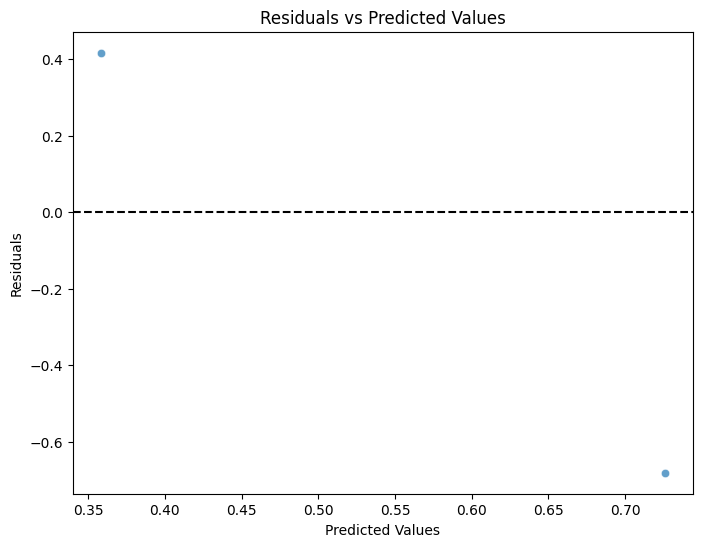

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred is the predictions from your model and y_test is the actual values
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


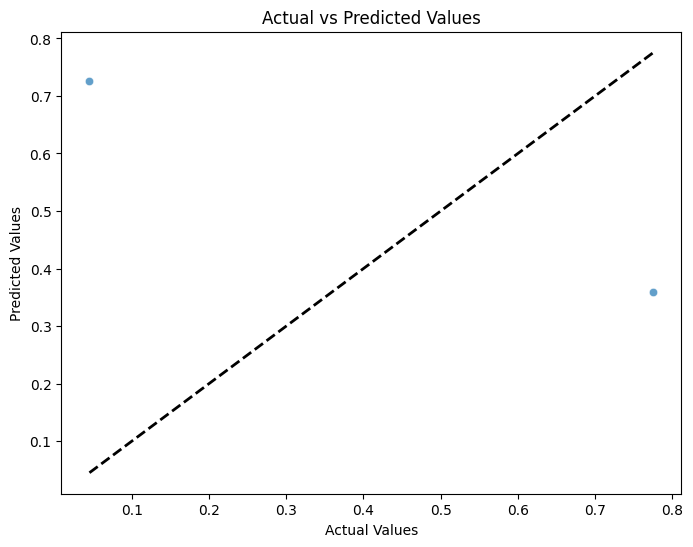

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


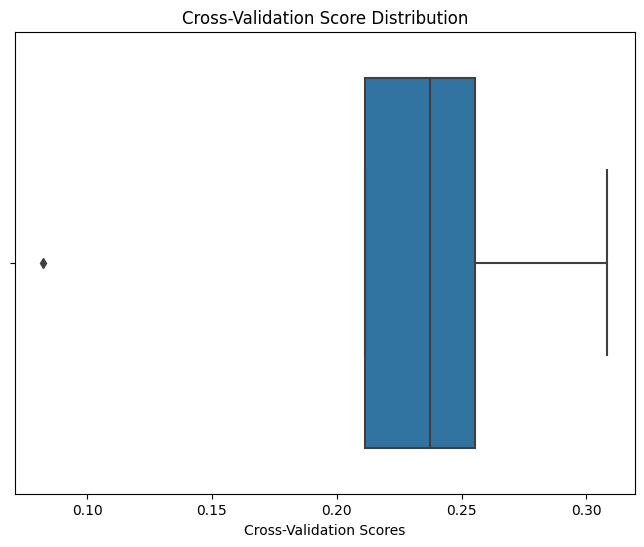

In [ ]:
import seaborn as sns

# Assuming cross_val_scores is an array of cross-validation scores
cross_val_scores = [0.25539306, 0.08237703, 0.21141442, 0.23734681, 0.3081477]

plt.figure(figsize=(8, 6))
sns.boxplot(x=cross_val_scores)
plt.xlabel('Cross-Validation Scores')
plt.title('Cross-Validation Score Distribution')
plt.show()


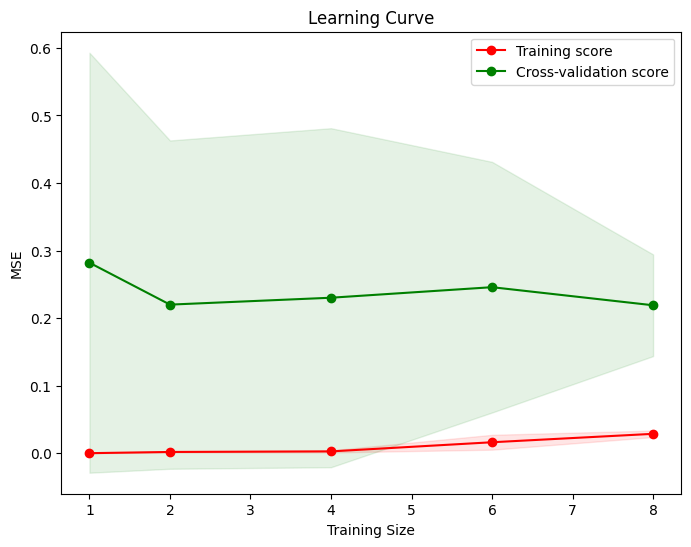

In [ ]:
from sklearn.model_selection import learning_curve

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

# Plot the standard deviation as shaded regions
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)

plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already defined
# Perform additional preprocessing and feature engineering as needed

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define an improved neural network model
class ImprovedModel(nn.Module):
    def __init__(self, input_size):
        super(ImprovedModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = ImprovedModel(input_size=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse = mean_squared_error(y_test_tensor, predictions)
    mae = mean_absolute_error(y_test_tensor, predictions)
    rmse = mean_squared_error(y_test_tensor, predictions, squared=False)  # RMSE
    r2 = r2_score(y_test_tensor, predictions)

    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'R-squared (R2): {r2:.4f}')


TypeError: must be real number, not builtin_function_or_method

In [ ]:
import torch

# Assuming y_train and y_test are Pandas Series or numpy arrays

# Convert y_train and y_test to PyTorch tensors
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)



AttributeError: 'builtin_function_or_method' object has no attribute 'reshape'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Convert y_train and y_test to PyTorch tensors
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

# Define an improved neural network model
class ImprovedModel(nn.Module):
    def __init__(self, input_size):
        super(ImprovedModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = ImprovedModel(input_size=X_train_scaled.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(torch.tensor(X_train_scaled, dtype=torch.float32))
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(torch.tensor(X_test_scaled, dtype=torch.float32))
    mse = mean_squared_error(y_test_tensor, predictions)
    mae = mean_absolute_error(y_test_tensor, predictions)
    rmse = mean_squared_error(y_test_tensor, predictions, squared=False)  # RMSE
    r2 = r2_score(y_test_tensor, predictions)

    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'R-squared (R2): {r2:.4f}')


AttributeError: 'builtin_function_or_method' object has no attribute 'reshape'